In [1]:
# Se importan las bibliotecas que se necesitan para trabajar 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Se carga la base de datos
data_original=pd.read_excel("Amazon.xlsx")
data_original 

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1
96,Teofil,305,25,46,24,33,28,355,26,45
97,Teofila,1,14,26,25,24,27,42,185,23
98,Teon,155,11,335,34,26,29,42,215,27


In [3]:
# Para analizar los datos removeremos la columna de los nombres 
data=data_original.drop(columns=["Unnamed: 0"])
data

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,205,3,345,235,24,23,26,21,17
1,9,15,315,33,25,4,42,215,28
2,17,26,285,3,43,27,41,26,33
3,135,5,355,295,18,23,39,195,17
4,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...
95,3,8,32,25,7,21,42,17,1
96,305,25,46,24,33,28,355,26,45
97,1,14,26,25,24,27,42,185,23
98,155,11,335,34,26,29,42,215,27


In [4]:
# Se normalizan los datos
from sklearn.preprocessing import normalize 
data_scaled= normalize (data)
data_scaled

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [5]:
# Se hace un data frama de nuevo con los datos normalizados
data_scaled= pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642


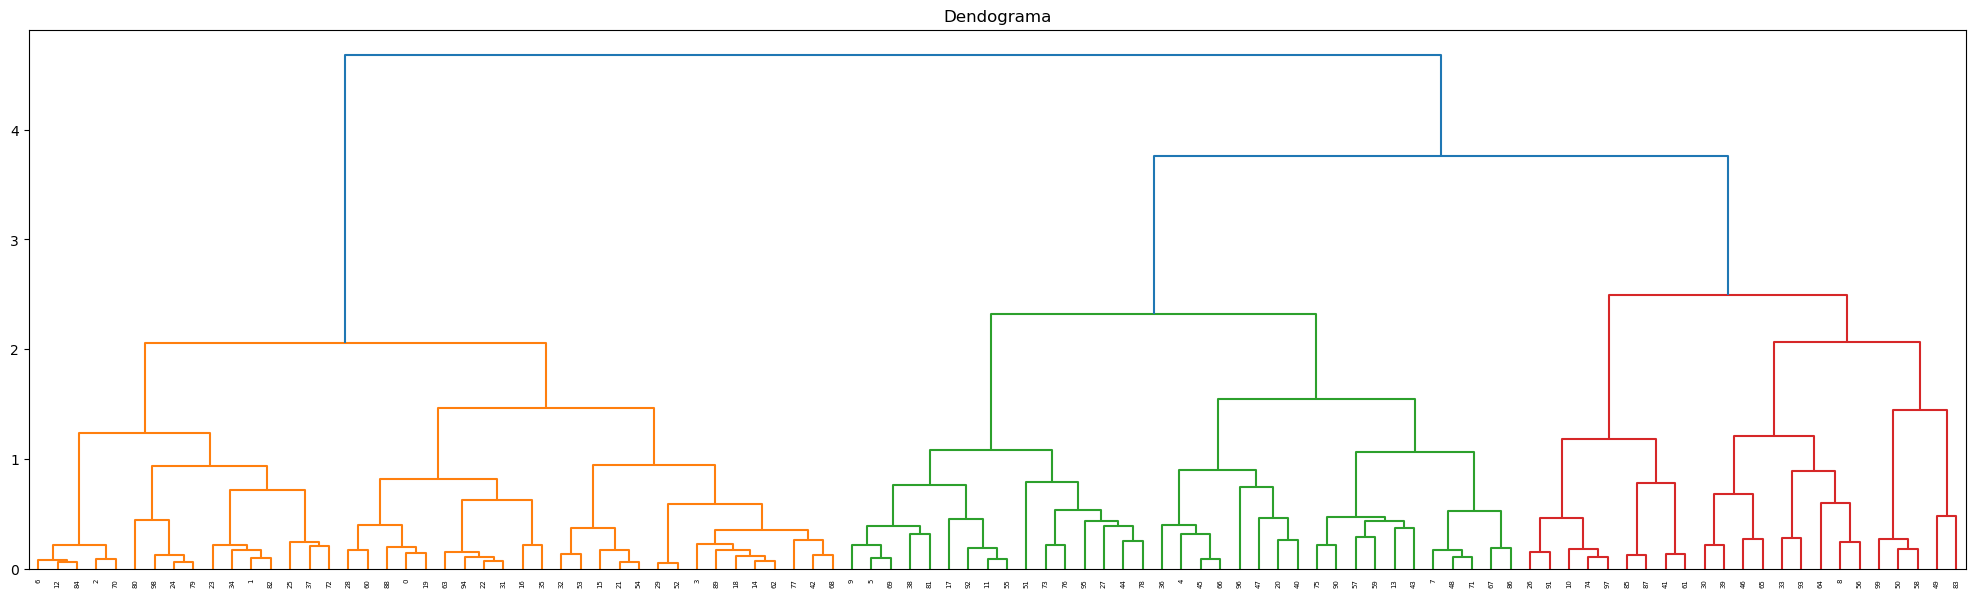

In [6]:
# Se gráfica el dendograma
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(25,7))
plt.title("Dendograma")
dend=shc.dendrogram(shc.linkage(data_scaled, method="ward"))

In [7]:
#  Se pueden observar tres clustes sin embargo usaremos jupyter para comprobarlo 
colores_unicos=set(dend["color_list"])
num_clusters_optimo=len (colores_unicos)-1
num_clusters_optimo

3

In [8]:
# Separacion de grupos mediante PCA
campos=data_scaled 
from sklearn import decomposition 
pca=  decomposition.PCA(n_components=2)
pca.fit(campos)
campos=pca.transform(campos)
campos

array([[-0.39993219,  0.06035374],
       [-0.40829583, -0.06402268],
       [-0.49703182, -0.35955286],
       [-0.33996675,  0.18434501],
       [ 0.58207751, -0.38797653],
       [ 0.1723403 , -0.52962573],
       [-0.56528441, -0.33770585],
       [ 0.5335887 ,  0.06994712],
       [ 0.09981604,  0.47165743],
       [ 0.22195207, -0.56503313],
       [ 0.08274005,  0.39712712],
       [-0.00143465, -0.48936583],
       [-0.57292039, -0.35927774],
       [ 0.51350639,  0.01301312],
       [-0.35272162,  0.20639728],
       [-0.4688626 ,  0.0168001 ],
       [-0.25142488,  0.04599019],
       [-0.05456876, -0.22302796],
       [-0.36123131,  0.20553368],
       [-0.41087067,  0.02173183],
       [ 0.54207892, -0.03308916],
       [-0.5138909 , -0.0900875 ],
       [-0.4284552 , -0.0601418 ],
       [-0.42320562, -0.09945498],
       [-0.42610215,  0.06318626],
       [-0.10615885, -0.20376697],
       [ 0.19058214,  0.3966612 ],
       [-0.096838  , -0.33104612],
       [-0.51505714,

In [9]:
# Se procesan los datos para poder hacer la grafica de dispersion 
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=3,metric="euclidean", linkage="ward")
grupos=cluster.fit_predict(data_scaled)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0], dtype=int64)

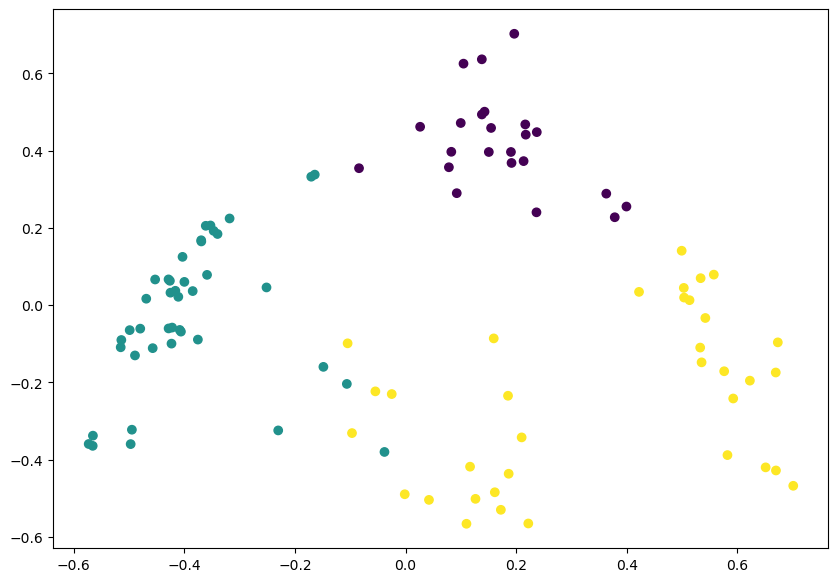

In [10]:
# Hacemos la gráfica de dispersion 
plt.figure(figsize=(10,7))
plt.scatter(campos[:,0], campos[:,1], c=cluster.labels_)

In [11]:
# Elaboramos una data frame con los datos obetenidos 
dataframe=pd.DataFrame(grupos, columns=["grupo"])
dataframe

,grupo
0,1
1,1
2,1
3,1
4,2
...,...
95,2
96,2
97,0
98,1


In [12]:
dataframe2=pd.concat([data_original,dataframe], axis=1, join="inner")
dataframe2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
...,...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1,2
96,Teofil,305,25,46,24,33,28,355,26,45,2
97,Teofila,1,14,26,25,24,27,42,185,23,0
98,Teon,155,11,335,34,26,29,42,215,27,1


In [13]:
pd.options.display.max_rows=None
dataframe2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
5,Fabian,95,165,395,24,26,19,485,22,3,2
6,Philip,23,12,475,33,35,45,38,29,31,1
7,Frank,65,21,31,255,28,22,345,215,29,2
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,2


Salome esta en el grupo porque sus prefrencias de productos son similares a los de este grupo, como lo pueden ser sebastian, sin embargo si observamos el dendograma con cuidado vemos que la persona mas cercana a ella es le numero 38 que es Joachim.

In [15]:
data_salome=dataframe2.loc[dataframe2["Unnamed: 0"]=="Salome"]
data_joachim=dataframe2.loc[dataframe2["Unnamed: 0"]=="Joachim" ]
data_compartativa=pd.concat([data_salome,data_joachim])
data_compartativa

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
81,Salome,17,23,275,41,4,44,315,28,32,2
38,Joachim,0,105,345,27,11,26,445,195,14,2


En esta pequeña tabla podemos observar que tan lejanos o cercanos están cada uno de los valores que ellos necesitan de sus productos.

Para Stephania seguimos el mismo proceso vemos que ella necesita el producto 1, además que ella es el número 89 en la tabla por lo cual su vecino más cercano no existe, ya que ella proviene de la rama conformada entre el 14 y 62 (Isidore y Markian).

Por últi,mo Lydia (número 54) pertenece también al grupo uno como Stephania, sin embar,go Lydia si tiene una persona más cercana a ella que es el número 21, Fedir.
